In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)

In [3]:
# df.head()

In [4]:
# df["class"].unique()

In [5]:
df["class"] = (df["class"] == 'g').astype(int)

In [6]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


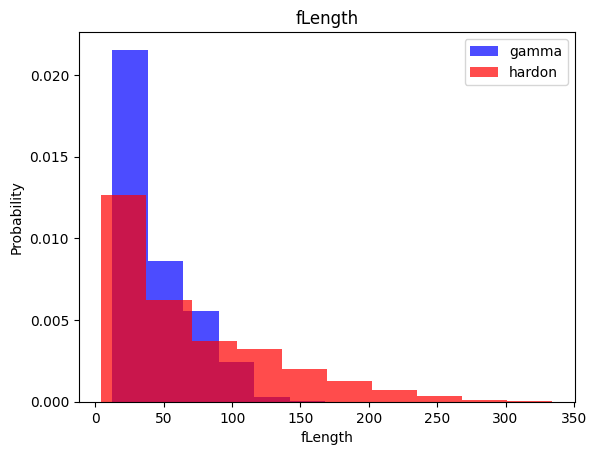

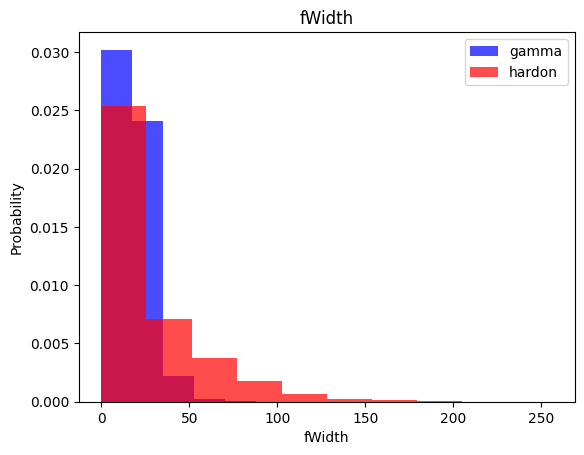

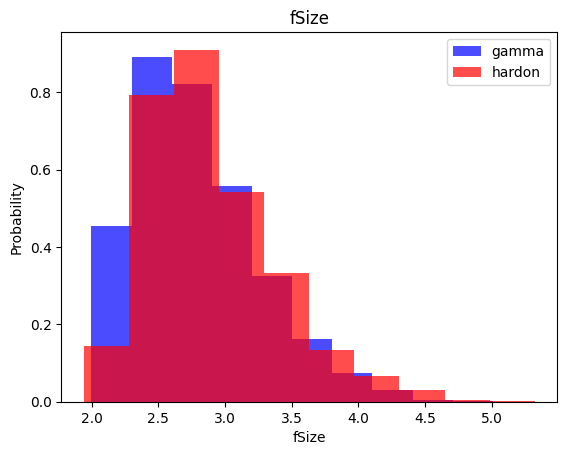

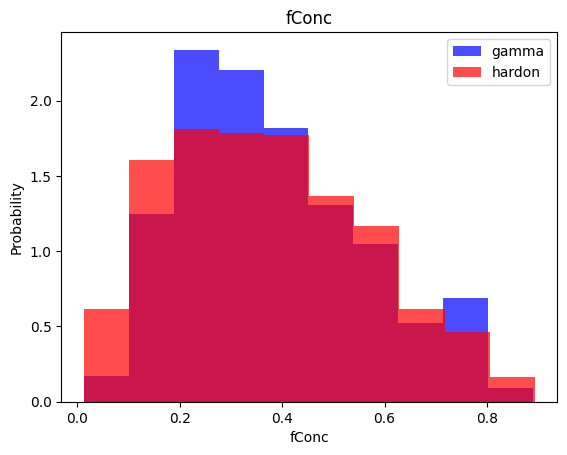

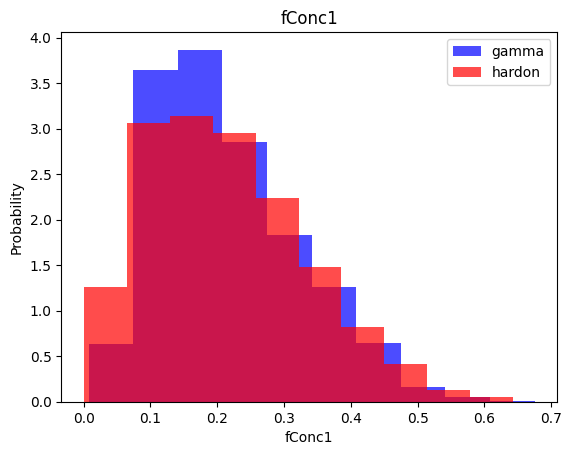

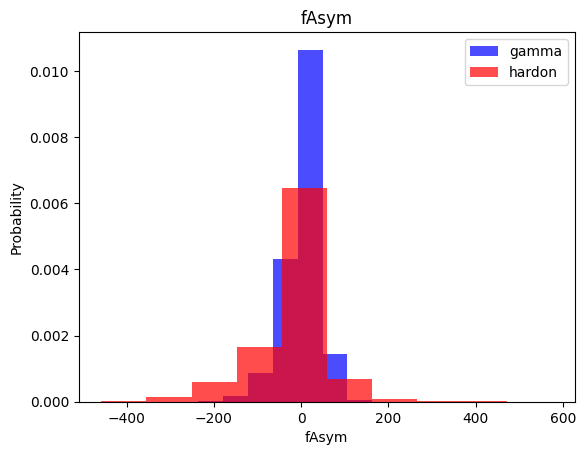

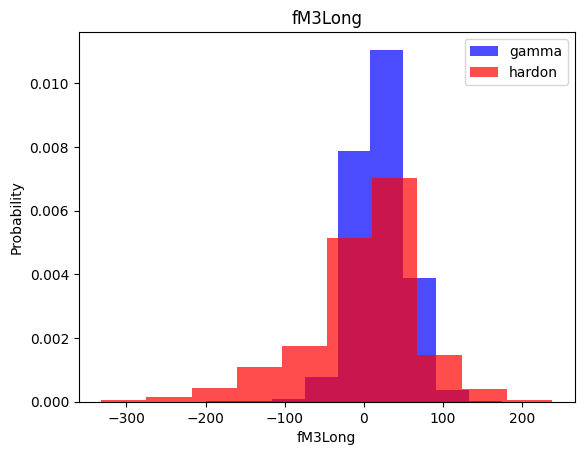

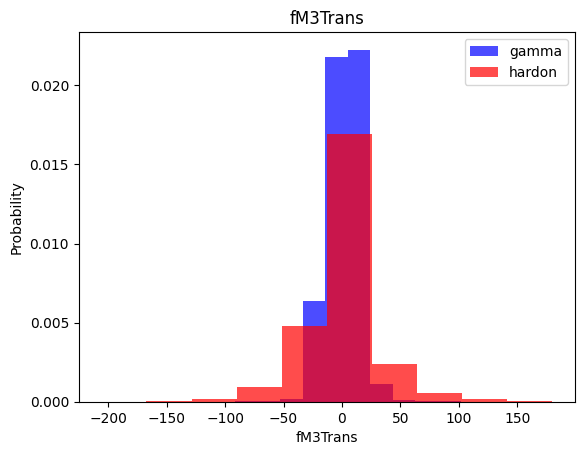

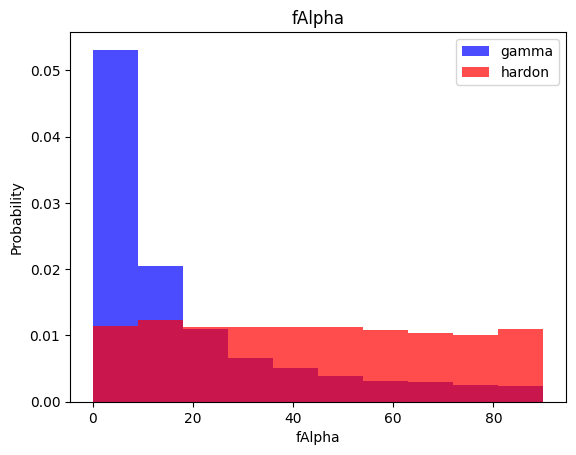

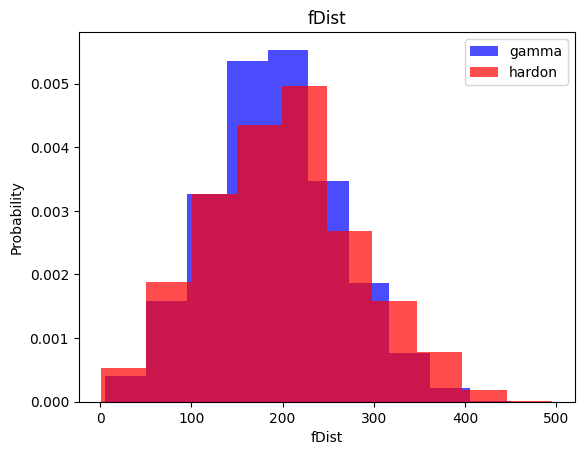

In [7]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color='blue', label ='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color='red', label ='hardon', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

Tran, Validation, Test Datasets

In [8]:
train , validate , test = np.split(df.sample(frac=1), [int(0.6*len(df)) , int(0.8*len(df))])

C:\Users\pa232\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
def scale_dataset(dataframe, overSampler=False):
   X = dataframe[dataframe.columns[:-1]].values
   Y = dataframe[dataframe.columns[-1]].values
   scaler = StandardScaler()
   X = scaler.fit_transform(X) 
   if overSampler:
       ros = RandomOverSampler()
       X , Y = ros.fit_resample(X,Y) 
   data = np.hstack((X , np.reshape(Y, (-1,1))))
   return data,X, Y

In [12]:
train, x_train, y_train = scale_dataset(train, overSampler=True)

In [26]:
y_train

array([1, 0, 1, ..., 0, 0, 0])

In [21]:
sum(y_train==1)

7428

In [22]:
sum(y_train==0)

7428